In [1]:
#importing required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
from sklearn.datasets import load_digits
hw_digits = load_digits()

In [3]:
# dir(hw_digits) returns the list of valid attributes of the passed object hw_digits
dir(hw_digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
hw_digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [5]:
hw_digits.target

array([0, 1, 2, ..., 8, 9, 8])

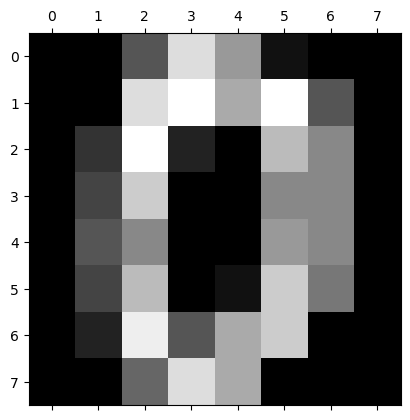

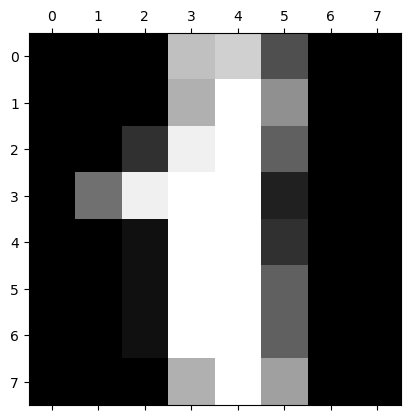

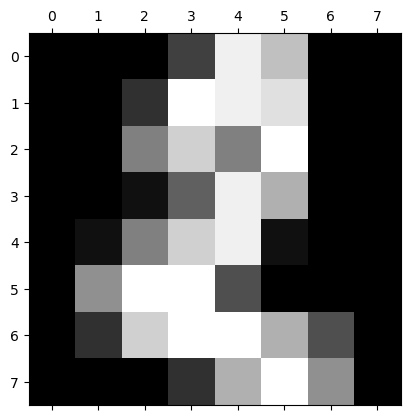

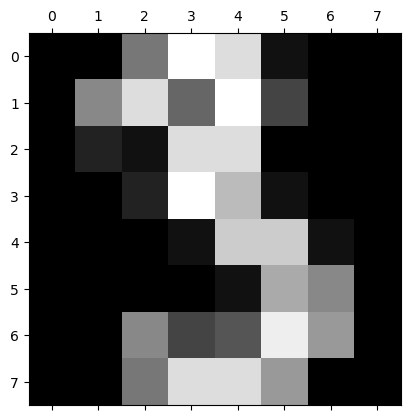

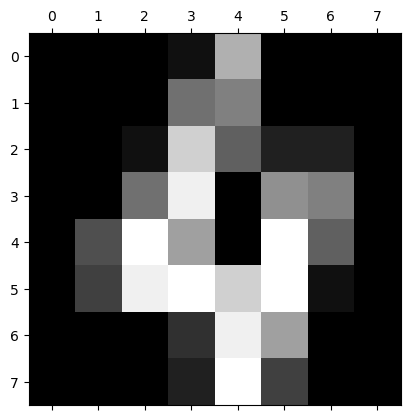

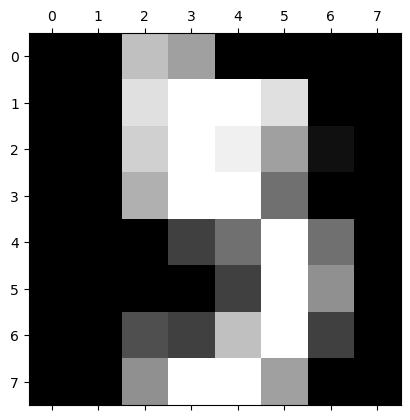

In [6]:
#Visualizing the first 5 images.
for i in range(0,6):
  plt.matshow(hw_digits.images[i], cmap=plt.cm.gray)

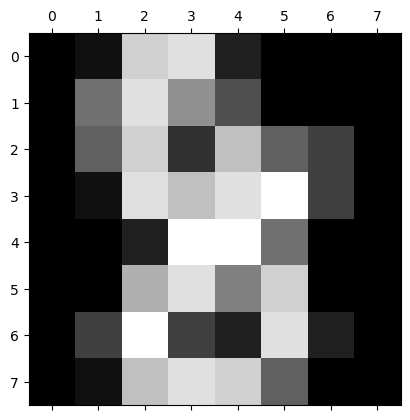

In [7]:
#visualizing image at random index
plt.matshow(hw_digits.images[1067], cmap=plt.cm.gray)

In [8]:
#Split the data into training and test sets. Use 80% for training and 20% for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hw_digits.data, hw_digits.target, test_size=0.2, random_state=1)

In [9]:
print(X_test.shape)
print(X_train.shape)

(360, 64)
(1437, 64)


In [10]:
#Creating the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors= 2)

In [11]:
#Training the model:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [12]:
#Calculating the accuracy score:
knn_classifier.score(X_test, y_test)

0.9916666666666667

In [13]:
#Perform prediction on test data  
predicted_data=knn_classifier.predict(X_test)

In [14]:
# defining a function to estimate label for given data
def estimate_label(data):
  return predicted_data[data]

In [15]:
#testing estimate_label() performs appropriately or not with specified parameters
estimate_label(4)

1

In [16]:
# defining a function to print out the misclassified data
def misclassify(testData):
  j=0
  misclassified_data= []
  for i in testData:
    #print(i)
    predicted_label = estimate_label(j)
    j=j+1
    #print(predicted_label)
    if(predicted_label != i):
      misclassified_data.append(predicted_label)
      #print("missclassification")
  print(misclassified_data)
  return misclassified_data


In [17]:
#printing out the misclassified data
MISCLASSIFIED = misclassify(y_test)
total = len(y_test)
#print(MISCLASSIFIED)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

[3, 9, 1]
Accuracy: 0.9916666666666667
Number of misclassified images = 3 out of 360


In [18]:
#Experiment over multiple k values for KNN (k=4)
knn_classifier = KNeighborsClassifier(n_neighbors= 4)
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)

0.9944444444444445

In [19]:
#Experiment over multiple k values for KNN (k=5)
knn_classifier = KNeighborsClassifier(n_neighbors= 5)
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)

0.9944444444444445

In [20]:
#Experiment over multiple k values for KNN (k=3)
knn_classifier = KNeighborsClassifier(n_neighbors= 3)
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)

0.9944444444444445

Max Accuracy:- 0.9972222222222222 at K = 7
[0.9916666666666667, 0.9916666666666667, 0.9944444444444445, 0.9944444444444445, 0.9944444444444445, 0.9944444444444445, 0.9972222222222222, 0.9972222222222222, 0.9972222222222222, 0.9944444444444445, 0.9916666666666667, 0.9944444444444445, 0.9916666666666667, 0.9916666666666667, 0.9861111111111112, 0.9861111111111112, 0.9861111111111112, 0.9861111111111112, 0.9861111111111112] [0.9916666666666667, 0.9916666666666667, 0.9944444444444445, 0.9944444444444445, 0.9944444444444445, 0.9944444444444445, 0.9972222222222222, 0.9972222222222222, 0.9972222222222222, 0.9944444444444445, 0.9916666666666667, 0.9944444444444445, 0.9916666666666667, 0.9916666666666667, 0.9861111111111112, 0.9861111111111112, 0.9861111111111112, 0.9861111111111112, 0.9861111111111112]


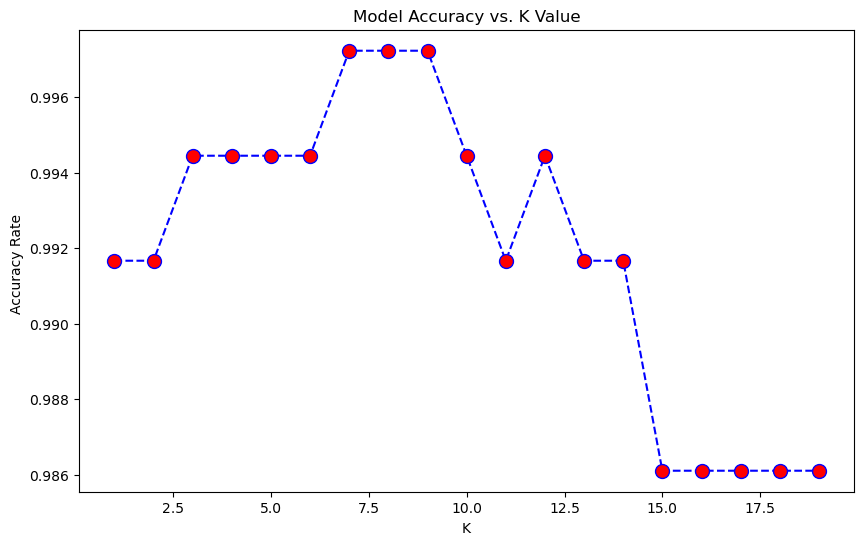

In [21]:
#Experimenting over multiple k values (1,20) for KNN and computing the training and testing scores and ploting the accuracy.
#from sklearn import metrics
accuracy_rate = []
test_score=[]
for i in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  #accuracy_rate.append(metrics.accuracy_score(y_test, pred_i))
  accuracy_rate.append(knn.score(X_test, y_test))
  test_score.append(np.mean(pred_i == y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Model Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate ')
print("Max Accuracy:-",max(accuracy_rate),"at K =",accuracy_rate.index(max(accuracy_rate))+1)
print(accuracy_rate,test_score)